<h1 style="color:red">1. IMPORTAMOS LIBRERIAS</h1>

In [5]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go



from sklearn.decomposition import LatentDirichletAllocation

from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

<h1 style="color:red">2. EXPLORACION INICIAL DEL CONJUNTO DE DATOS</h1>

- Cargamos los datos y visualizamos las primeras filas.

- Observamos la estructura del conjunto de datos y el tipo de datos de cada columna.

In [6]:
# Cargar el archivo CSV
df = pd.read_csv('../youtoxic_english_1000.csv')

In [7]:
# Mostrar las primeras filas del dataset
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


### Descripcion del dataset

- **CommentId:** Identificador único del comentario.

- **VideoId:** Identificador único del video al que pertenece el comentario.

- **Text:** Texto del comentario.

Estas columnas booleanas proporcionan diferentes etiquetas que clasifican el tipo de toxicidad o naturaleza negativa de un comentario.

- **IsToxic**
- **IsAbusive**
- **IsThreat**
- **IsProvocative**
- **IsObscene**
- **IsHatespeech**
- **IsRacist**
- **IsNationalist**
- **IsSexist**
- **IsHomophobic**
- **IsReligiousHate**
- **sRadicalism**


Indican si el comentario tiene características tóxicas específicas (abusivo, amenazante, provocador, obsceno, discurso de odio, racista, nacionalista, sexista, homofóbico, odio religioso, radicalismo, etc.).


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


<h1 style="color:red">3. ESTADISTICAS DESCRIPTIVAS Y LIMPIEZA DE DATOS</h1>

In [9]:
df.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,Ugg2KwwX0V8-aXgCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


In [10]:
# Comprobar valores nulos
null_values = df.isnull().sum()

null_values

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [11]:
# Estadísticas descriptivas
desc_stats = {
    'Total Comments': df.shape[0],
    'Total Videos': df['VideoId'].nunique(),
    'Total Toxic Comments': df['IsToxic'].sum(),
    'Total Abusive Comments': df['IsAbusive'].sum(),
    'Total Threatening Comments': df['IsThreat'].sum(),
    'Total Provocative Comments': df['IsProvocative'].sum(),
    'Total Obscene Comments': df['IsObscene'].sum(),
    'Total Hate Speech Comments': df['IsHatespeech'].sum(),
    'Total Racist Comments': df['IsRacist'].sum(),
    'Total Nationalist Comments': df['IsNationalist'].sum(),
    'Total Sexist Comments': df['IsSexist'].sum(),
    'Total Homophobic Comments': df['IsHomophobic'].sum(),
    'Total Religious Hate Comments': df['IsReligiousHate'].sum(),
    'Total Radicalism Comments': df['IsRadicalism'].sum()
}

desc_stats

{'Total Comments': 1000,
 'Total Videos': 13,
 'Total Toxic Comments': 462,
 'Total Abusive Comments': 353,
 'Total Threatening Comments': 21,
 'Total Provocative Comments': 161,
 'Total Obscene Comments': 100,
 'Total Hate Speech Comments': 138,
 'Total Racist Comments': 125,
 'Total Nationalist Comments': 8,
 'Total Sexist Comments': 1,
 'Total Homophobic Comments': 0,
 'Total Religious Hate Comments': 12,
 'Total Radicalism Comments': 0}

### Resumen de las estadísticas descriptivas basadas en el conjunto de datos:

**- Total de comentarios: 1000**

**- No hay valores nulos**

**-Total de videos: 13**

- Comentarios tóxicos: 462
- Comentarios abusivos: 353
- Comentarios amenazantes: 21
- Comentarios provocativos: 161
- Comentarios obscenos: 100
- Comentarios de discurso de odio: 138
- Comentarios racistas: 125
- Comentarios nacionalistas: 8
- Comentarios sexistas: 1
- Comentarios homofóbicos: 0
- Comentarios de odio religioso: 12
- Comentarios radicalizados: 0

<h1 style="color:red">4. ANALISIS DE ETIQUETAS</h1>

### Visualizaremos la distribución de los comentarios tóxicos y no tóxicos y también ver cómo se distribuyen las diferentes clases de toxicidad.​​

In [12]:
labels = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech', 
          'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']
toxicity_counts = df[labels].sum()


# Visualizar la distribución de comentarios tóxicos y no tóxicos usando plotly
fig1 = px.histogram(df, x='IsToxic', title='Distribución de Comentarios Tóxicos y No Tóxicos', 
                   labels={'IsToxic': '¿Es tóxico?', 'count': 'Número de Comentarios'}, 
                   category_orders={"IsToxic": [False, True]})
fig1.show()

# Visualizar la distribución de las diferentes clases de toxicidad usando plotly
toxicity_counts_df = toxicity_counts.sort_values(ascending=True).reset_index()
toxicity_counts_df.columns = ['Clases de Toxicidad', 'Número de Comentarios']

fig2 = px.bar(toxicity_counts_df, y='Clases de Toxicidad', x='Número de Comentarios', orientation='h',
             title='Distribución de Clases de Toxicidad')
fig2.show()

Las visualizaciones presentan las siguientes observaciones:

- Hay una distribución casi equilibrada entre los comentarios tóxicos y no tóxicos, aunque hay más comentarios no tóxicos.

- Las amenazas, el nacionalismo, el sexismo, la homofobia y el radicalismo tienen una representación muy baja o nula en el conjunto de datos.

- Los comentarios abusivos, los discursos de odio, los comentarios provocativos y los comentarios racistas son las categorías más comunes después de la etiqueta general de toxicidad.

### Profundizaremos en las estadísticas descriptivas del texto de los comentarios. 

Veremos aspectos como la longitud del comentario en términos de caracteres, el número promedio de caracteres por palabra y otros aspectos relacionados.​​

In [13]:
# Estadísticas descriptivas del texto

# Crear la columna 'Word Count'
df['Word Count'] = df['Text'].apply(lambda x: len(str(x).split()))

# Calcular 'Char Count' y 'Avg Word Length'
df['Char Count'] = df['Text'].apply(len)
df['Avg Word Length'] = df['Char Count'] / df['Word Count']

# Obtener las estadísticas descriptivas del texto
text_stats = {
    'Average Char Count': df['Char Count'].mean(),
    'Minimum Char Count': df['Char Count'].min(),
    'Maximum Char Count': df['Char Count'].max(),
    'Average Word Length': df['Avg Word Length'].mean()
}

text_stats


{'Average Char Count': 185.554,
 'Minimum Char Count': 3,
 'Maximum Char Count': 4421,
 'Average Word Length': 5.579758340132971}

En resumen:

- **Promedio de caracteres por comentario:** Aproximadamente 186 caracteres
- **Mínimo de caracteres en un comentario:** 3 caracteres
- **Máximo de caracteres en un comentario:** 4421 caracteres
- **Longitud promedio de palabra:** Aproximadamente 5.58 caracteres por palabra

### Vamos a analizar la distribución de comentarios por video.​​

In [14]:
# Distribución de comentarios por video
comments_per_video = df.groupby('VideoId').size().reset_index(name='Number of Comments')
comments_per_video_stats = {
    'Average Comments per Video': comments_per_video['Number of Comments'].mean(),
    'Minimum Comments in a Video': comments_per_video['Number of Comments'].min(),
    'Maximum Comments in a Video': comments_per_video['Number of Comments'].max()
}

comments_per_video_stats


{'Average Comments per Video': 76.92307692307692,
 'Minimum Comments in a Video': 8,
 'Maximum Comments in a Video': 274}

En cuanto a la distribución de comentarios por video:

- Comentarios promedio por video: Aproximadamente 77
- Mínimo de comentarios en un video: 8
- Máximo de comentarios en un video: 274


### Analizaremos la distribución de palabras en los comentarios.​​

In [15]:
# Distribución de palabras en los comentarios
df['Word Count'] = df['Text'].apply(lambda x: len(str(x).split()))

word_count_stats = {
    'Average Word Count': df['Word Count'].mean(),
    'Minimum Word Count': df['Word Count'].min(),
    'Maximum Word Count': df['Word Count'].max()
}

word_count_stats


{'Average Word Count': 33.776,
 'Minimum Word Count': 1,
 'Maximum Word Count': 815}

En cuanto a la distribución de palabras en los comentarios:

- Promedio de palabras por comentario: Aproximadamente 34 palabras
- Mínimo de palabras en un comentario: 1 palabra
- Máximo de palabras en un comentario: 815 palabras

### Ahora, vamos a analizar la distribución de las etiquetas

Es decir, cuántos comentarios tienen cada etiqueta y cuántos comentarios tienen múltiples etiquetas.​​

In [16]:
# Distribución de las etiquetas
labels = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']
df['Number of Labels'] = df[labels].sum(axis=1)

label_distribution = df['Number of Labels'].value_counts().reset_index().rename(columns={'index': 'Number of Labels in a Comment', 'Number of Labels': 'Number of Comments'})

label_distribution


,Number of Comments,count
0,0,538
1,3,294
2,2,100
3,4,47
4,5,15
5,6,6


Aquí está la distribución de las etiquetas en los comentarios:

- 538 comentarios no tienen ninguna etiqueta (es decir, no se consideran tóxicos según ninguna de las categorías proporcionadas).
- 294 comentarios tienen 3 etiquetas.
- 100 comentarios tienen 2 etiquetas.
- 47 comentarios tienen 4 etiquetas.
- 15 comentarios tienen 5 etiquetas.
- 6 comentarios tienen 6 etiquetas.

Esto indica que, aunque hay una gran cantidad de comentarios que no se consideran tóxicos, hay una proporción significativa de comentarios que tienen múltiples formas de toxicidad.

### Ahora haremos mas visual lo que acabamos de hacer

In [17]:
# Visualizar la distribución de las etiquetas usando plotly
label_sums = df[labels].sum()

label_sums_df = label_sums.reset_index()
label_sums_df.columns = ['Label', 'Number of Comments']

fig = px.bar(label_sums_df, x='Label', y='Number of Comments', 
             title='Distribution of Labels in the Dataset', 
             color='Number of Comments', color_continuous_scale='viridis')
fig.update_layout(xaxis_tickangle=45)
fig.show()


### Vamos a examinar las correlaciones entre las etiquetas 

Esto con el fin de ver si ciertas etiquetas tienden a aparecer juntas en los comentarios. Utilizaremos un mapa de calor para visualizar estas correlaciones.​​

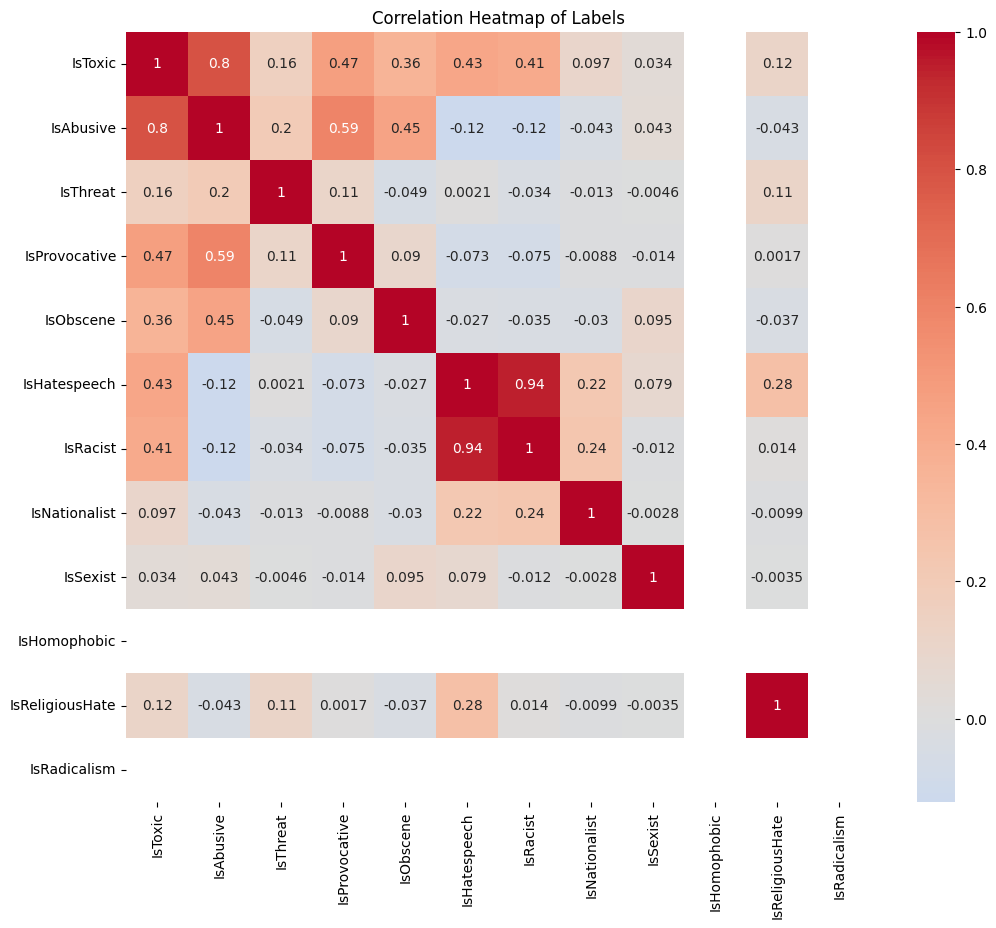

In [18]:
# Correlación entre las etiquetas
correlations = df[labels].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation Heatmap of Labels')
plt.show()

El mapa de calor muestra las correlaciones entre las diferentes etiquetas. Estas son algunas observaciones:

- Hay una correlación fuerte entre "IsToxic" e "IsAbusive", lo que indica que los comentarios etiquetados como tóxicos a menudo también se etiquetan como abusivos.

- "IsRacist" e "IsHatespeech" también muestran una correlación relativamente alta.

- La mayoría de las otras etiquetas no tienen correlaciones fuertes entre sí.

<h5 style="color:green">El entendimiento de estas correlaciones puede ser útil para modelar y predecir la toxicidad en los comentarios, ya que ciertas etiquetas pueden influir en la probabilidad de otras.</h5>

<h1 style="color:red">5. ANALISIS DETALLADO DE LOS COMENTARIOS</h1>

### 1. Distribución de la longitud de los comentarios

Comenzaremos visualizando la distribución de la longitud de los comentarios en términos de palabras y caracteres.

In [19]:
# Visualizar la distribución del recuento de palabras usando plotly
fig1 = px.histogram(df, x='Word Count', nbins=50, marginal='box',
                    title='Distribution of Word Count in Comments')
fig1.update_layout(xaxis_title='Number of Words', yaxis_title='Number of Comments')
fig1.show()

# Visualizar la distribución del recuento de caracteres usando plotly
fig2 = px.histogram(df, x='Char Count', nbins=50, marginal='box',
                    title='Distribution of Character Count in Comments', color_discrete_sequence=['salmon'])
fig2.update_layout(xaxis_title='Number of Characters', yaxis_title='Number of Comments')
fig2.show()


CONCLUSIONES:

- La mayoría de los comentarios tienen menos de 100 palabras, aunque hay algunos comentarios que son significativamente más largos.

- La distribución de la longitud en caracteres muestra un patrón similar, con la mayoría de los comentarios teniendo menos de 500 caracteres.

### 2. N-gramas más comunes

Identificaremos y visualizaremos las palabras y frases más comunes en los comentarios.

In [20]:
# Filtrar comentarios tóxicos
toxic_comments = df[df['IsToxic'] == True]['Text']

# Palabras más comunes
word_vectorizer = CountVectorizer(stop_words='english', max_features=10)
word_counts = word_vectorizer.fit_transform(toxic_comments)
word_sum = word_counts.sum(axis=0)
words_freq = [(word, word_sum[0, idx]) for word, idx in word_vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Bi-gramas más comunes
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=10)
bigram_counts = bigram_vectorizer.fit_transform(toxic_comments)
bigram_sum = bigram_counts.sum(axis=0)
bigrams_freq = [(bigram, bigram_sum[0, idx]) for bigram, idx in bigram_vectorizer.vocabulary_.items()]
bigrams_freq = sorted(bigrams_freq, key=lambda x: x[1], reverse=True)

words_freq, bigrams_freq


([('black', 133),
  ('people', 128),
  ('white', 78),
  ('just', 75),
  ('like', 75),
  ('police', 73),
  ('brown', 55),
  ('fuck', 51),
  ('shot', 50),
  ('shit', 45)],
 [('black people', 33),
  ('white people', 20),
  ('mike brown', 14),
  ('michael brown', 13),
  ('black lives', 10),
  ('police officer', 10),
  ('lives matter', 9),
  ('piece shit', 9),
  ('got shot', 9),
  ('black man', 8)])

Las palabras y bi-gramas más comunes en los comentarios tóxicos son:

**Palabras más comunes:**

- 'black' (133 veces)
- 'people' (128 veces)
- 'white' (78 veces)
- 'just' (75 veces)
- 'like' (75 veces)
- 'police' (73 veces)
- 'brown' (55 veces)
- 'fuck' (51 veces)
- 'shot' (50 veces)
- 'shit' (45 veces)

**Bi-gramas más comunes:**

- 'black people' (33 veces)
- 'white people' (20 veces)
- 'mike brown' (14 veces)
- 'michael brown' (13 veces)
- 'black lives' (10 veces)
- 'police officer' (10 veces)
- 'lives matter' (9 veces)
- 'piece shit' (9 veces)
- 'got shot' (9 veces)
- 'black man' (8 veces)

Estos términos y frases sugieren que muchos de los comentarios tóxicos pueden estar relacionados con temas raciales.

### 3. Distribución de comentarios tóxicos por video

Veremos la distribución de comentarios tóxicos en relación con cada video.

In [21]:
# Distribución de comentarios tóxicos por video
toxic_per_video = df[df['IsToxic'] == True].groupby('VideoId').size().reset_index(name='Number of Toxic Comments').sort_values(by='Number of Toxic Comments', ascending=False)

# Visualizar la distribución de comentarios tóxicos por video usando plotly
fig = px.bar(toxic_per_video, x='VideoId', y='Number of Toxic Comments', 
             title='Distribution of Toxic Comments per Video', 
             color='Number of Toxic Comments', color_continuous_scale='magma')
fig.update_layout(xaxis_tickangle=45, yaxis_title='Number of Toxic Comments')
fig.show()


CONCLUSIONES:

- Se puede observar que algunos videos tienen un número significativamente mayor de comentarios tóxicos en comparación con otros.

- Esto podría indicar que ciertos videos o temas son más propensos a atraer comentarios tóxicos o que tienen una mayor visibilidad y, por lo tanto, más comentarios en general.

### 4. Análisis de sentimientos

Aunque la toxicidad y el sentimiento no son lo mismo, puede ser interesante ver cómo se distribuyen los sentimientos en los comentarios. 

Utilizaremos el paquete TextBlob para realizar un análisis de sentimientos rápido y obtener la polaridad de cada comentario. La polaridad oscila entre -1 (negativo) y 1 (positivo), con 0 siendo neutral.​​

In [22]:
# Analizar el sentimiento de cada comentario
df['Sentiment_Polarity'] = df['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Visualizar la distribución del análisis de sentimientos usando plotly
fig = px.histogram(df, x='Sentiment_Polarity', nbins=30, 
                   title='Distribution of Sentiments', 
                   color_discrete_sequence=['purple'])
fig.update_layout(xaxis_title='Sentiment Polarity', yaxis_title='Number of Comments')
fig.show()

CONCLUSIONES:

- La distribución muestra que la mayoría de los comentarios tienen un sentimiento neutro (cerca de 0), pero hay una buena cantidad de comentarios con sentimientos tanto positivos como negativos. 

- Es interesante notar que hay comentarios con un sentimiento fuertemente negativo, lo que podría estar relacionado con su naturaleza tóxica.

- Es importante señalar que la toxicidad y el sentimiento no siempre están correlacionados. Un comentario puede ser negativo en sentimiento pero no necesariamente tóxico.

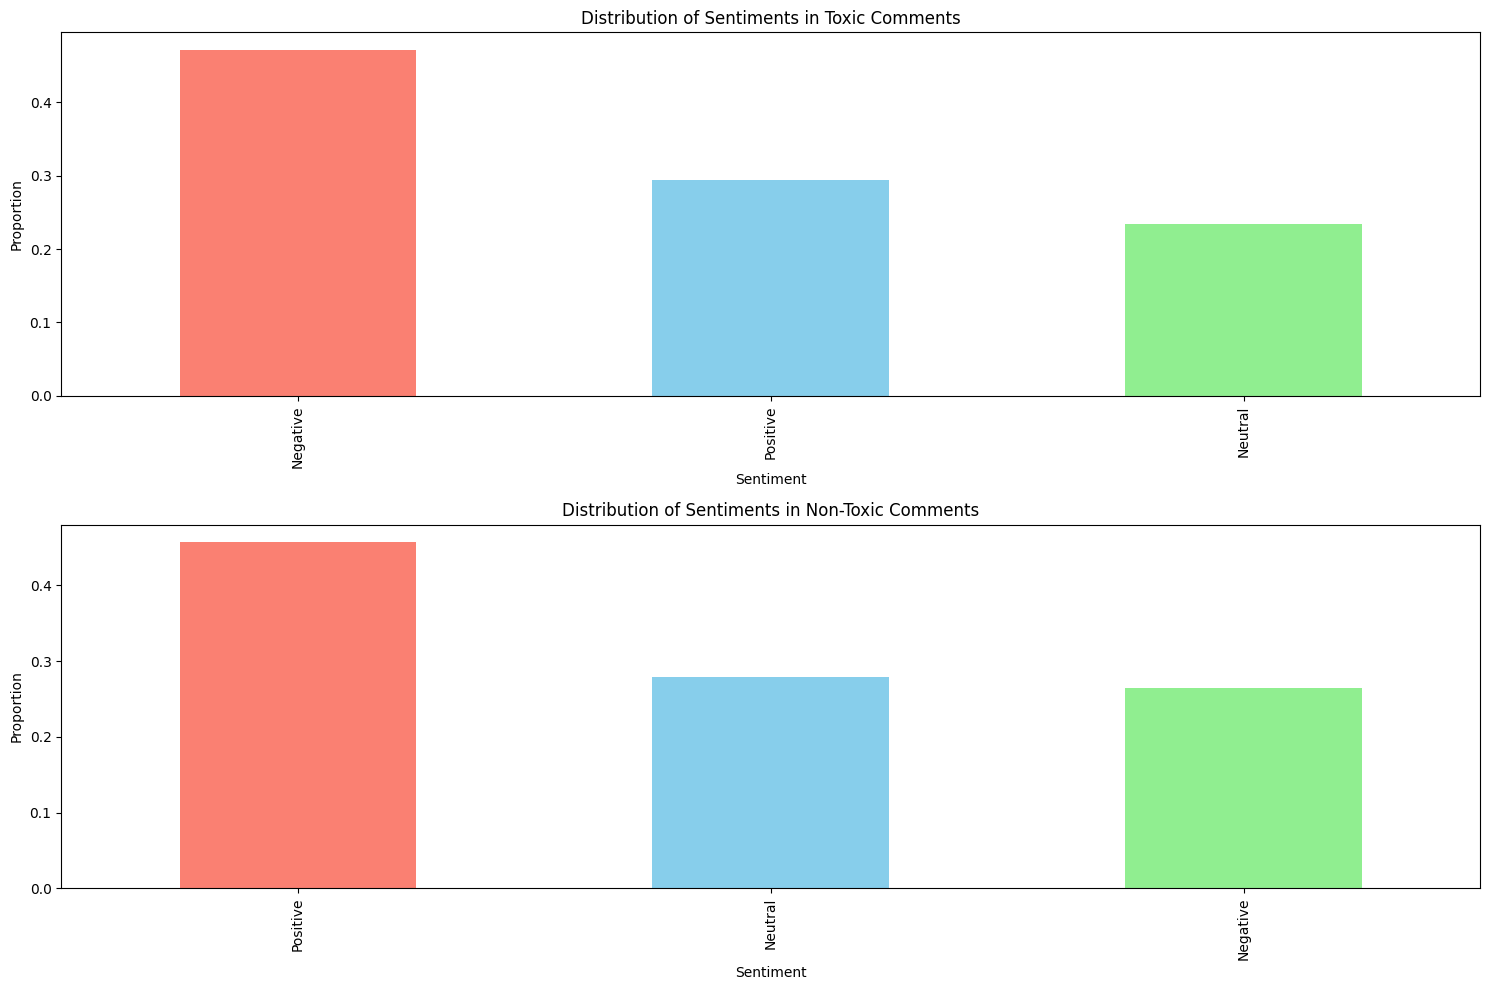

In [23]:
# Definir la función get_sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Asignar sentimientos a los comentarios nuevamente
df['Sentiment'] = df['Text'].apply(get_sentiment)

# Comparar la distribución de sentimientos entre comentarios tóxicos y no tóxicos
toxic_sentiment_distribution = df[df['IsToxic'] == True]['Sentiment'].value_counts(normalize=True)
non_toxic_sentiment_distribution = df[df['IsToxic'] == False]['Sentiment'].value_counts(normalize=True)

# Visualización
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

toxic_sentiment_distribution.plot(kind='bar', ax=axes[0], color=['salmon', 'skyblue', 'lightgreen'])
axes[0].set_title('Distribution of Sentiments in Toxic Comments')
axes[0].set_ylabel('Proportion')
axes[0].set_xlabel('Sentiment')

non_toxic_sentiment_distribution.plot(kind='bar', ax=axes[1], color=['salmon', 'skyblue', 'lightgreen'])
axes[1].set_title('Distribution of Sentiments in Non-Toxic Comments')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()

Las gráficas muestran la distribución de los sentimientos en comentarios tóxicos y no tóxicos:

- Para los comentarios tóxicos, la mayoría son neutrales o negativos, con una pequeña proporción de comentarios positivos.

- Para los comentarios no tóxicos, la mayoría también son neutrales, pero hay una mayor proporción de comentarios positivos en comparación con los tóxicos.

Esto sugiere que, aunque la toxicidad y el sentimiento no siempre están correlacionados, hay una tendencia a que los comentarios tóxicos sean más negativos en sentimiento.

### 5. Análisis de palabras clave

Identificaremos palabras clave que son indicativas de ciertas etiquetas de toxicidad. Para este propósito, nos centraremos en las etiquetas "IsToxic" y "IsRacist" como ejemplos.​​

In [24]:
# Definir las etiquetas de toxicidad
labels = [
    'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 
    'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 
    'IsReligiousHate', 'IsRadicalism'
]

# Función para obtener las palabras clave de una etiqueta específica
def get_label_keywords(label, top_n=10):
    vectorizer = CountVectorizer(stop_words='english', max_features=top_n)
    vectorizer_fit = vectorizer.fit_transform(df[df[label]]['Text'])
    vectorizer_sum = vectorizer_fit.sum(axis=0)
    keywords_freq = [(word, vectorizer_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return sorted(keywords_freq, key=lambda x: x[1], reverse=True)

# Función modificada para obtener las palabras clave de una etiqueta específica de manera segura
def safe_get_label_keywords(label, top_n=10):
    try:
        return get_label_keywords(label, top_n)
    except:
        return []

# Obtener las palabras clave para todas las etiquetas de manera segura
all_label_keywords = {label: safe_get_label_keywords(label) for label in labels}

print(all_label_keywords)

{'IsToxic': [('black', 133), ('people', 128), ('white', 78), ('just', 75), ('like', 75), ('police', 73), ('brown', 55), ('fuck', 51), ('shot', 50), ('shit', 45)], 'IsAbusive': [('people', 77), ('black', 71), ('police', 62), ('just', 56), ('fuck', 48), ('shit', 40), ('brown', 38), ('like', 38), ('shot', 36), ('don', 32)], 'IsThreat': [('kill', 4), ('need', 4), ('protesters', 4), ('just', 4), ('shit', 3), ('ran', 3), ('run', 3), ('shoot', 2), ('driver', 2), ('drivers', 2)], 'IsProvocative': [('people', 44), ('black', 40), ('police', 38), ('just', 30), ('run', 24), ('shot', 18), ('fuck', 18), ('cop', 18), ('shoot', 15), ('cops', 15)], 'IsObscene': [('black', 45), ('fuck', 36), ('people', 34), ('shit', 30), ('just', 23), ('police', 22), ('fucking', 21), ('like', 19), ('don', 17), ('ass', 16)], 'IsHatespeech': [('black', 88), ('people', 71), ('white', 57), ('like', 49), ('brown', 26), ('blacks', 25), ('just', 24), ('thug', 22), ('did', 20), ('shot', 20)], 'IsRacist': [('black', 87), ('peopl

Las palabras clave más comunes son:

- **IsToxic:** black, people, white, just, like, police, brown, fuck, shot, shit

- **IsAbusive:** people, black, police, just, fuck, shit, brown, like, shot, don

- **IsThreat:** kill, need, protesters, just, shit, ran, run, shoot, driver, drivers

- **IsProvocative:** people, black, police, just, run, shot, fuck, cop, shoot, cops

- **IsObscene:** black, fuck, people, shit, just, police, fucking, like, don, ass

- **IsHatespeech:** black, people, white, like, brown, blacks, just, thug, did, shot

- **IsRacist:** black, people, white, like, brown, blacks, thug, just, shot, whites

- **sNationalist:** people, usa, earth, hate, stupid, hahahaha, absolutely, gain, happen, good

- **IsSexist:** anna, dumb, ass, joe, rogan, clue, porn, leave, job, intelligent

- **IsHomophobic:** (sin palabras clave suficientes o sin comentarios asociados)

- **IsReligiousHate:** people, muslim, isis, shit, shot, terrorist, like, islamic, masri, man

- **IsRadicalism:** (sin palabras clave suficientes o sin comentarios asociados)





Estas palabras clave indican temas recurrentes en los comentarios.

### 6. Análisis de outliers

Vamos a identificar y analizar los comentarios que son atípicos en términos de longitud.​​

In [25]:
# Identificar outliers en términos de recuento de palabras
Q1 = df['Word Count'].quantile(0.25)
Q3 = df['Word Count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar comentarios que son outliers
outliers = df[(df['Word Count'] < lower_bound) | (df['Word Count'] > upper_bound)]

outliers_info = {
    'Total Outliers': outliers.shape[0],
    'Average Word Count of Outliers': outliers['Word Count'].mean(),
    'Minimum Word Count of Outliers': outliers['Word Count'].min(),
    'Maximum Word Count of Outliers': outliers['Word Count'].max()
}

outliers_info

{'Total Outliers': 86,
 'Average Word Count of Outliers': 151.36046511627907,
 'Minimum Word Count of Outliers': 85,
 'Maximum Word Count of Outliers': 815}

En términos de longitud de comentarios (recuento de palabras):

- Total de outliers: 86 comentarios
- Promedio de palabras en outliers: Aproximadamente 151 palabras
- Mínimo de palabras en outliers: 85 palabras
- Máximo de palabras en outliers: 815 palabras

Estos comentarios outliers son significativamente más largos que la mayoría de los otros comentarios en el conjunto de datos.

### 7. Word clouds

Finalmente, generaremos nubes de palabras para los comentarios tóxicos y no tóxicos para obtener una representación visual de las palabras más frecuentes en cada categoría.​​

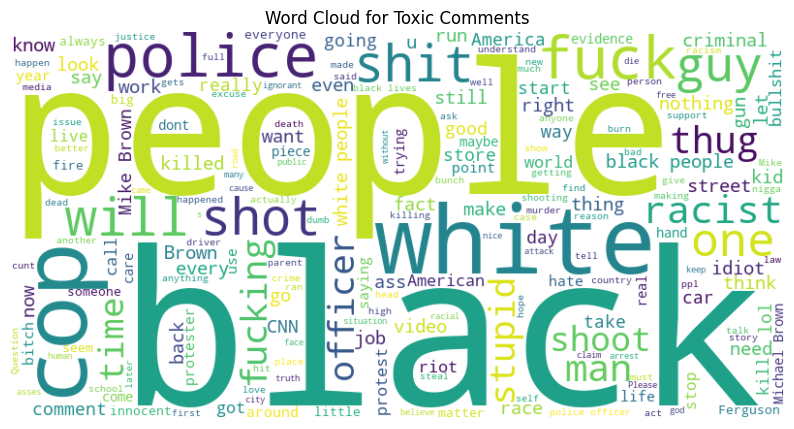

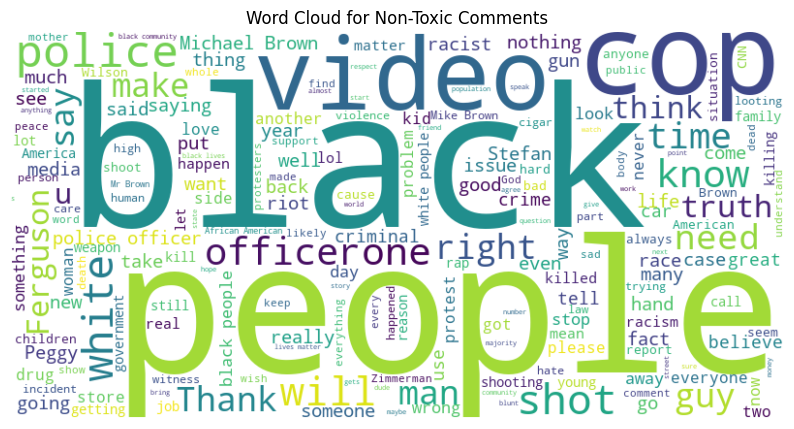

In [26]:
# Función para generar word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(str(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Word cloud para comentarios tóxicos
toxic_text = ' '.join(df[df['IsToxic'] == True]['Text'])
generate_wordcloud(toxic_text, 'Word Cloud for Toxic Comments')

# Word cloud para comentarios no tóxicos
nontoxic_text = ' '.join(df[df['IsToxic'] == False]['Text'])
generate_wordcloud(nontoxic_text, 'Word Cloud for Non-Toxic Comments')


Las nubes de palabras proporcionan una representación visual de las palabras más frecuentes:

- **Nube de palabras para comentarios tóxicos:**

Observamos palabras como "black", "people", "white", "police", "like", "fuck", entre otras, que sugieren temas raciales y términos ofensivos.

- **Nube de palabras para comentarios no tóxicos:**

Las palabras en esta nube son más variadas y menos ofensivas, con términos como "people", "black", "police", "white", entre otros, pero en un contexto menos tóxico.

### 8. Topic Modeling usando LDA

Usaremos el modelo LDA (Latent Dirichlet Allocation) para identificar temas comunes en los comentarios.

In [27]:
# Preparar el vectorizador y la matriz de términos-documento nuevamente
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return topics

vectorizer_reloaded = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
term_matrix_reloaded = vectorizer_reloaded.fit_transform(df['Text'])

# Aplicar LDA nuevamente
lda_reloaded = LatentDirichletAllocation(n_components=5, random_state=42)
lda_reloaded.fit(term_matrix_reloaded)

# Intentar mostrar los temas nuevamente
try:
    topics_reloaded = display_topics(lda_reloaded, vectorizer_reloaded.get_feature_names_out(), 10)
except Exception as e:
    topics_reloaded = str(e)

topics_reloaded

['people just black don like brown white police run blacks',
 'police officer brown cop shot did people need use video',
 'just shot cop know cops guy did officer fucking like',
 'police people like just time did thank video don white',
 'black white people like man just brown police race racist']

Hemos identificado cinco temas principales en el conjunto de datos a través del modelado de temas con LDA:

- Discusiones sobre raza, particularmente en relación con las personas negras y blancas, y la policía.
- Menciones sobre el oficial de policía, posiblemente en relación con un incidente específico o video.
- Comentarios relacionados con un tiroteo y la acción policial.
- Discusiones generales sobre la policía y apreciación por el video.
- Temas centrados en la raza, incluyendo menciones de racismo.

In [28]:
# Filtrar el DataFrame para incluir solo comentarios tóxicos
toxic_comments = df[df['IsToxic'] == True]['Text']

# Preparar el vectorizador y la matriz de términos-documento para comentarios tóxicos
vectorizer_toxic = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
term_matrix_toxic = vectorizer_toxic.fit_transform(toxic_comments)

# Aplicar LDA
lda_toxic = LatentDirichletAllocation(n_components=5, random_state=42)
lda_toxic.fit(term_matrix_toxic)

# Mostrar temas en comentarios tóxicos
topics_toxic = display_topics(lda_toxic, vectorizer_toxic.get_feature_names_out(), 10)
topics_toxic

['white people black police blacks whites just officer mike cop',
 'black shot white brown shoot like shit police cop guy',
 'don just like thug brown right fuck did cnn people',
 'black people like police white just run fucking fuck matter',
 'just racist shit shot fuck stupid know people police work']

Esta es una lista de los cinco temas principales identificados en los comentarios tóxicos utilizando el modelado de temas con LDA. 

Cada elemento de la lista representa un tema, y las palabras dentro de cada elemento son las palabras clave más representativas de ese tema.

Aquí hay una interpretación de cada tema:

- 'white people black police blacks whites just officer mike cop': Este tema parece centrarse en las discusiones relacionadas con la raza (términos "white", "black", "blacks", "whites") y la policía (términos "police", "officer", "cop"). La presencia de un nombre específico como "mike" podría indicar discusiones sobre un incidente o persona específica.

- 'black shot white brown shoot like shit police cop guy': Aquí, las palabras "shot", "shoot", "police", y "cop" sugieren discusiones sobre incidentes de tiroteos o violencia. Los términos relacionados con la raza ("black", "white", "brown") también están presentes, lo que indica que la raza podría ser un tema de discusión en el contexto de estos tiroteos.

- 'don just like thug brown right fuck did cnn people': En este tema, palabras como "thug" y "brown" podrían estar relacionadas con discusiones sobre una persona o incidente específico. La mención de "cnn" sugiere que podría haber una referencia a la cobertura de medios o noticias.

- 'black people like police white just run fucking fuck matter': Este tema parece abordar discusiones sobre la raza y la policía, con términos como "black", "white", "police", y "run". La palabra "matter" podría estar relacionada con el movimiento "Black Lives Matter".

- 'just racist shit shot fuck stupid know people police work': Las palabras "racist", "shot", "police", y "work" sugieren discusiones sobre acusaciones de racismo, posiblemente en el contexto de acciones policiales.


En resumen, estos temas indican que muchos de los comentarios tóxicos en el conjunto de datos están centrados en discusiones sobre raza, policía, y posiblemente incidentes específicos o cobertura mediática. Es importante recordar que estas son interpretaciones basadas en las palabras clave y pueden no capturar completamente el contexto o el significado completo de los comentarios.